<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Descripcipción-del-proyecto" data-toc-modified-id="Descripcipción-del-proyecto-2">Descripcipción del proyecto</a></span><ul class="toc-item"><li><span><a href="#Inicialización" data-toc-modified-id="Inicialización-2.1">Inicialización</a></span></li><li><span><a href="#Cargar-datos" data-toc-modified-id="Cargar-datos-2.2">Cargar datos</a></span><ul class="toc-item"><li><span><a href="#Conclusión" data-toc-modified-id="Conclusión-2.2.1">Conclusión</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2.3">EDA</a></span></li><li><span><a href="#Procedimiento-de-evaluación" data-toc-modified-id="Procedimiento-de-evaluación-2.4">Procedimiento de evaluación</a></span></li><li><span><a href="#Normalización" data-toc-modified-id="Normalización-2.5">Normalización</a></span></li><li><span><a href="#División-entrenamiento-/-prueba" data-toc-modified-id="División-entrenamiento-/-prueba-2.6">División entrenamiento / prueba</a></span></li><li><span><a href="#Trabajar-con-modelos" data-toc-modified-id="Trabajar-con-modelos-2.7">Trabajar con modelos</a></span><ul class="toc-item"><li><span><a href="#Modelo-0---Constante" data-toc-modified-id="Modelo-0---Constante-2.7.1">Modelo 0 - Constante</a></span></li><li><span><a href="#Modelo-1---NLTK,-TF-IDF-y-LR" data-toc-modified-id="Modelo-1---NLTK,-TF-IDF-y-LR-2.7.2">Modelo 1 - NLTK, TF-IDF y LR</a></span></li><li><span><a href="#Modelo-2---spaCy,-TF-IDF-y-DecisionTree" data-toc-modified-id="Modelo-2---spaCy,-TF-IDF-y-DecisionTree-2.7.3">Modelo 2 - spaCy, TF-IDF y DecisionTree</a></span></li><li><span><a href="#Modelo-3---spaCy,-TF-IDF-y-LR" data-toc-modified-id="Modelo-3---spaCy,-TF-IDF-y-LR-2.7.4">Modelo 3 - spaCy, TF-IDF y LR</a></span></li><li><span><a href="#Modelo-4---spaCy,-TF-IDF-y-LGBMClassifier" data-toc-modified-id="Modelo-4---spaCy,-TF-IDF-y-LGBMClassifier-2.7.5">Modelo 4 - spaCy, TF-IDF y LGBMClassifier</a></span></li><li><span><a href="#Modelo-9---BERT" data-toc-modified-id="Modelo-9---BERT-2.7.6">Modelo 9 - BERT</a></span></li></ul></li><li><span><a href="#Mis-reseñas" data-toc-modified-id="Mis-reseñas-2.8">Mis reseñas</a></span><ul class="toc-item"><li><span><a href="#Modelo-2" data-toc-modified-id="Modelo-2-2.8.1">Modelo 2</a></span></li><li><span><a href="#Modelo-3" data-toc-modified-id="Modelo-3-2.8.2">Modelo 3</a></span></li><li><span><a href="#Modelo-4" data-toc-modified-id="Modelo-4-2.8.3">Modelo 4</a></span></li><li><span><a href="#Modelo-9" data-toc-modified-id="Modelo-9-2.8.4">Modelo 9</a></span></li></ul></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-2.9">Conclusiones</a></span></li></ul></li><li><span><a href="#Lista-de-comprobación" data-toc-modified-id="Lista-de-comprobación-3">Lista de comprobación</a></span></li></ul></div>

# Descripcipción del proyecto

Film Junky Union, una nueva comunidad vanguardista para los aficionados de las películas clásicas, está desarrollando un sistema para filtrar y categorizar reseñas de películas. Tu objetivo es entrenar un modelo para detectar las críticas negativas de forma automática. Para lograrlo, utilizarás un conjunto de datos de reseñas de películas de IMDB con leyendas de polaridad para construir un modelo para clasificar las reseñas positivas y negativas. Este deberá alcanzar un valor F1 de al menos 0.85.

## Inicialización

In [2]:
# Libraries
import math
import re
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from tqdm.auto import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.translate.meteor_score import wordnet

# nltk.download('wordnet') # base de datos léxica en inglés de la Universidad de Princeton.
# nltk.download('omw-1.4')
# nltk.download('punkt')
# nltk.download('stopwords')

c:\Users\jfcom\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# %matplotlib inline
# %config InlineBackend.figure_format = 'png'
# # la siguiente línea proporciona gráficos de mejor calidad en pantallas HiDPI
# # %config InlineBackend.figure_format = 'retina'

# plt.style.use('seaborn')

In [4]:
# esto es para usar progress_apply
tqdm.pandas()

## Cargar datos

In [5]:
try:
    df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})
except:
    df_reviews = pd.read_csv('C:/Users/jfcom/Documents/sprint14_project/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [6]:
#Visualización de datos
df_reviews.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


In [7]:
#Observación de información
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

Tenemos un total de 47331 datos y 16 columnas, existen dos culumnas con valores nulos (`average_rating` y `votes`), son unicamente dos calores por lo que eliminarlos no afectarian de gran manera a nuestra dataframe, sin embargo para el desarrollo del trabajo, las columnas de interes se describren a continuación:

1. `review`: el texto de la reseña;
2. `pos`: el objetivo, '0' para negativo y '1' para positivo;
3. `ds_part`: 'entrenamiento'/'prueba' columna que nos dará la división de nuestros datos para el modelado.

No se eliminaran las columnas por que estas nos serviran para el hacer un análisis exploratorio, a continuación hecharemos un vistazo del data set completo, buscaremos datos duplicados para eliminar dichos datos redundantes y exploraremos los valores nulos presentes.

Tenemos algunas columnas con el tipo de dato erroneo, estas columnas son: `end_year`, `runtime_minutes` que deberían de ser del tipo int

In [8]:
#Búsqueda de datos duplicados
print("Toal de datos duplicados:",df_reviews.duplicated().sum())

Toal de datos duplicados: 0


In [9]:
#Visualización de valores nulos
df_reviews[df_reviews['votes'].isna()]

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
22280,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,<NA>,"This is a truly great film, with excellent dir...",9,pos,1,test,3231
22281,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,<NA>,"A film is beyond all expectations, an excellen...",10,pos,1,test,3232


Los valores nulos del dataset están presentes en los mismos datos en las columnas `average_rating` y `votes`, como se considero anteriormente estas columnas no seran de nuestro interes, pero la información de las columnas `reviw`,`pos`,`ds_part` si, por lo que no eliminaremos esas columnas y mantendremos los valores nulos.

In [10]:
df_reviews.describe()

,start_year,is_adult,average_rating,votes,rating,pos,idx
count,47331.000000,47331.000000,47329.000000,47329.0,47331.000000,47331.000000,47331.000000
mean,1989.631235,0.001732,5.998278,25562.917323,5.484608,0.498954,6279.697999
std,19.600364,0.041587,1.494289,83670.039163,3.473109,0.500004,3605.702545
min,1894.000000,0.000000,1.400000,9.0,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,5.100000,827.0,2.000000,0.000000,3162.000000
50%,1998.000000,0.000000,6.300000,3197.0,4.000000,0.000000,6299.000000
75%,2004.000000,0.000000,7.100000,13974.0,9.000000,1.000000,9412.000000
max,2010.000000,1.000000,9.700000,1739448.0,10.000000,1.000000,12499.000000


## EDA

A continuación se presentan el número de películas y reseñas a lo largo de los años.

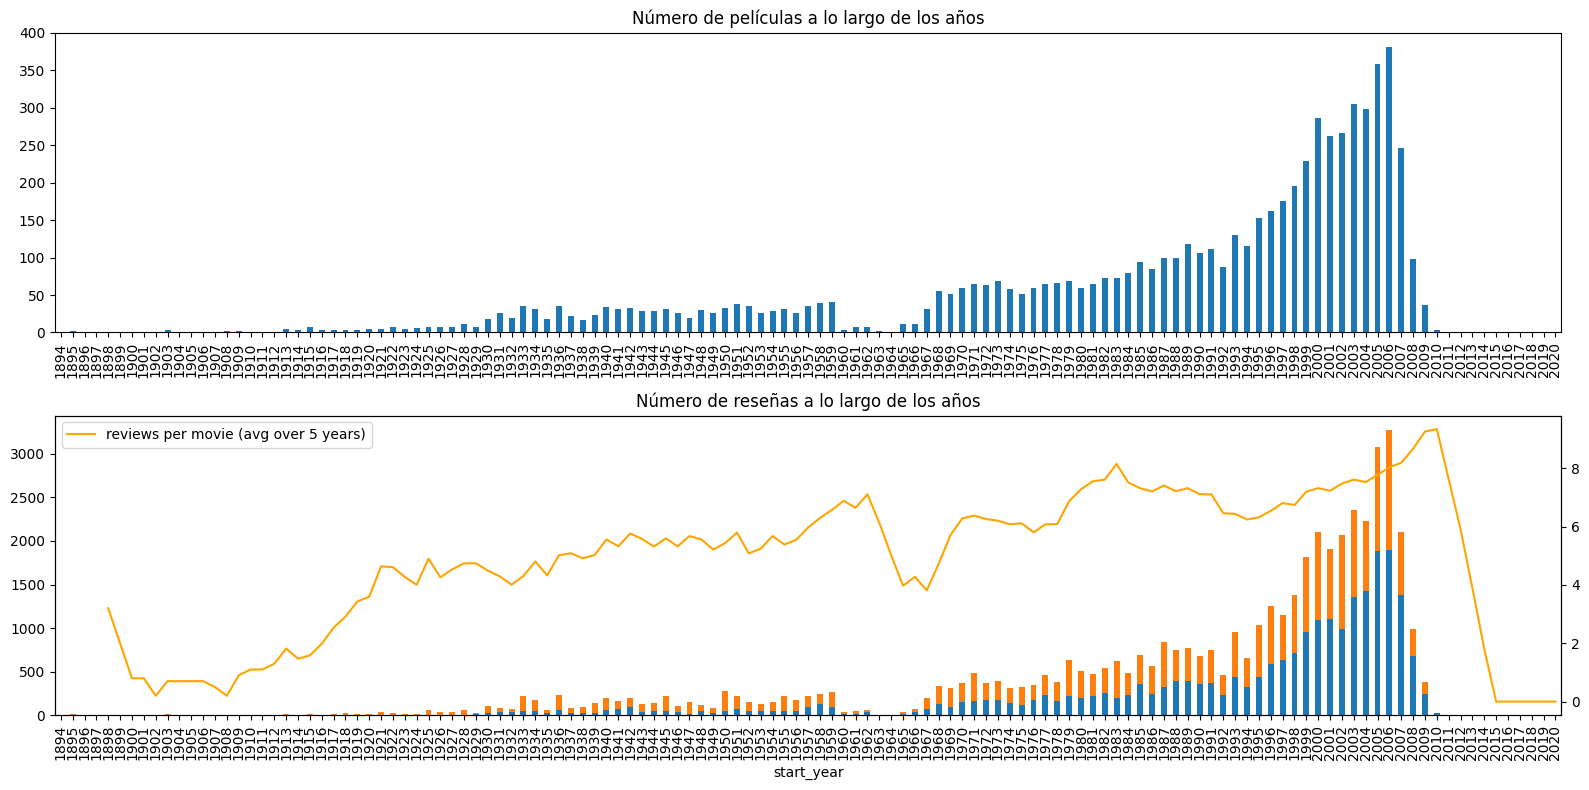

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de películas a lo largo de los años')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Número de reseñas a lo largo de los años')

fig.tight_layout()

los valores van de 1984 al 2010, podemos observar como la tendencia en general es creciente conforme pasan los años, vemos que en el 2006 hay un maximo de lanzamientos, en cuanto a las reseñas tienen el mismo comportamiento con una tendencia a que las personas dejan más opiniones a traves de los años

Veamos la distribución del número de reseñas por película con el conteo exacto y KDE (solo para saber cómo puede diferir del conteo exacto)

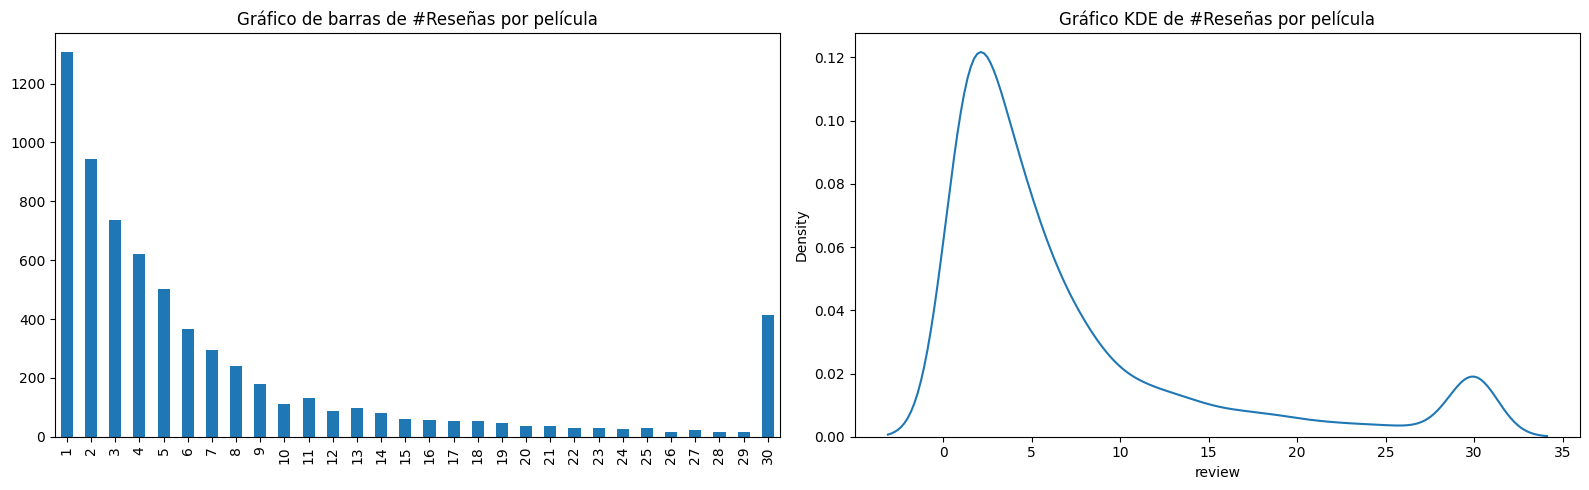

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Gráfico de barras de #Reseñas por película')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Gráfico KDE de #Reseñas por película')

fig.tight_layout()

In [13]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

Podemos observar que nuestro objetivo no está desbalanceado, tenemos casi un número igual de reseñas positivas y negativas

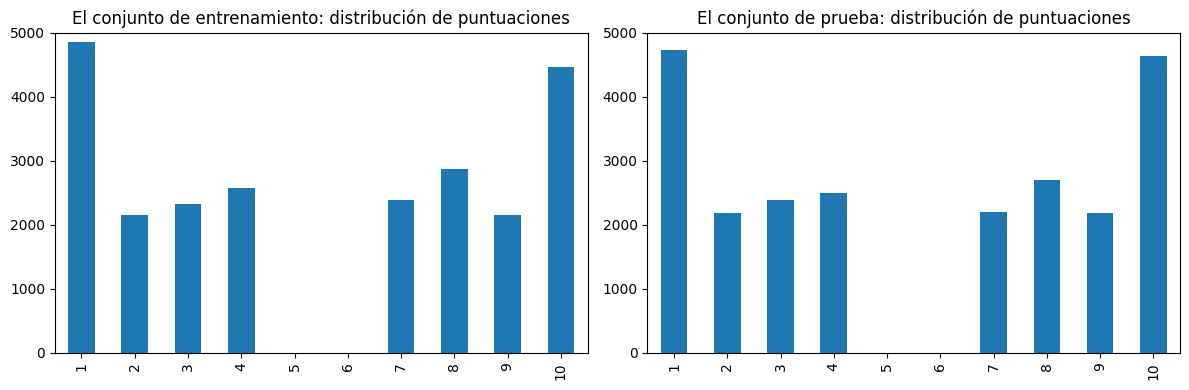

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de entrenamiento: distribución de puntuaciones')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de prueba: distribución de puntuaciones')

fig.tight_layout()

Distribución de reseñas negativas y positivas a lo largo de los años para dos partes del conjunto de datos

C:\Users\jfcom\AppData\Local\Temp\ipykernel_27360\1324160450.py:14: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
C:\Users\jfcom\AppData\Local\Temp\ipykernel_27360\1324160450.py:15: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
C:\Users\jfcom\AppData\Local\Temp\ipykernel_27360\1324160450.py:30: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
C:\Users\jfcom\AppData\Local\Temp\ipykernel_27360\1324160450.py:31: UserWarning: 

Support for a

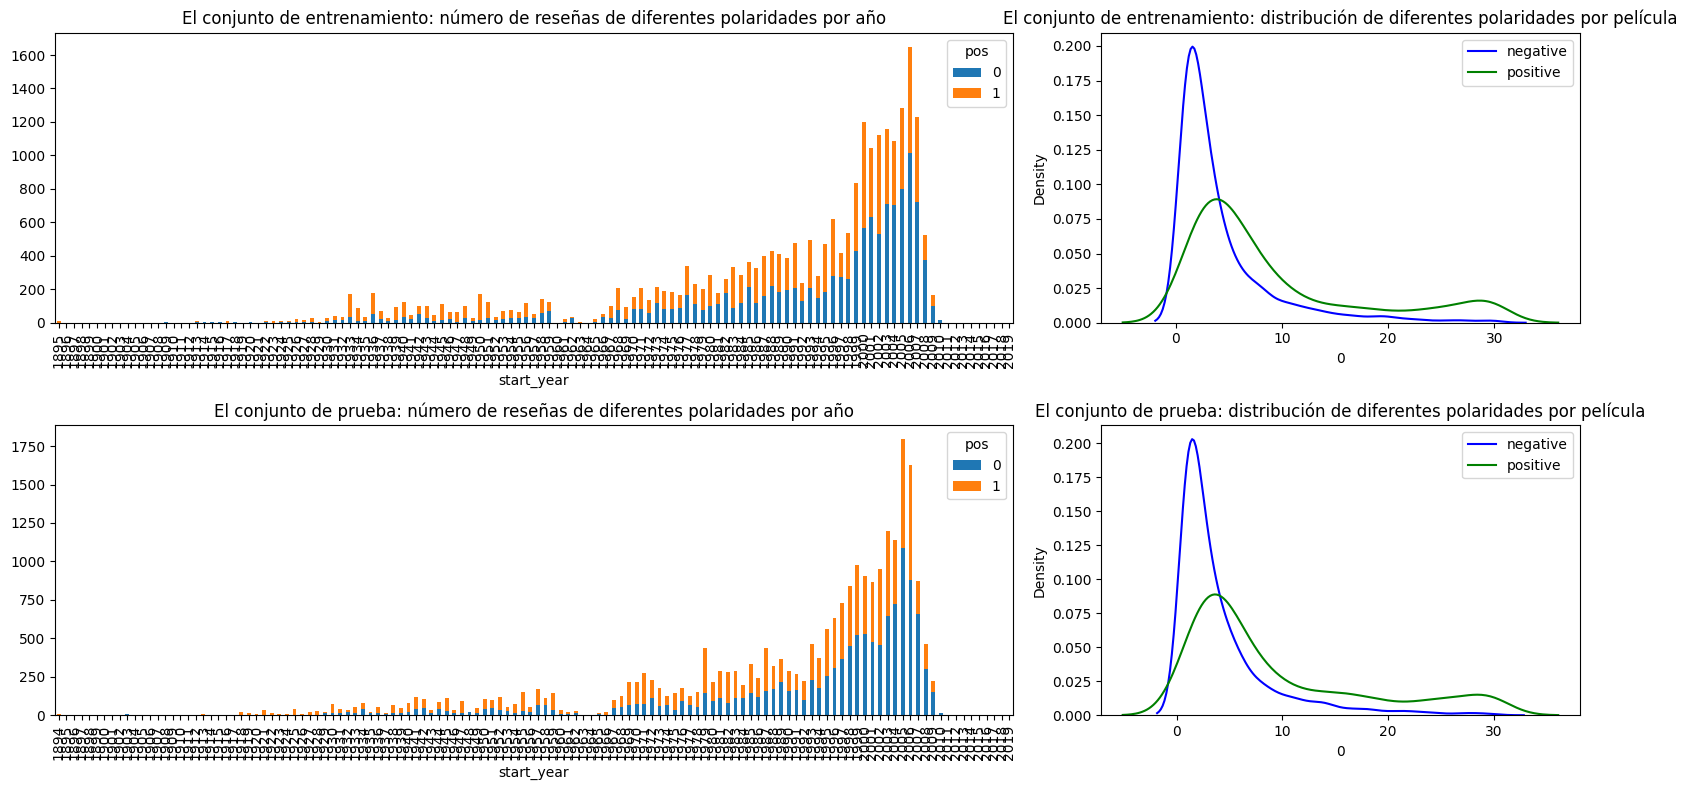

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de entrenamiento: número de reseñas de diferentes polaridades por año')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de entrenamiento: distribución de diferentes polaridades por película')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de prueba: número de reseñas de diferentes polaridades por año')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de prueba: distribución de diferentes polaridades por película')

fig.tight_layout()

Podemos observar que en nuestros conjuntos de entrenamiento tenemos una distribución parecida, sesgada hacia los últimos años, esto lo podemos notar igual en el gráfico con KDE

## Procedimiento de evaluación

Composición de una rutina de evaluación que se pueda usar para todos los modelos en este proyecto

In [16]:
import sklearn.metrics as metrics
def evaluate_model(model, train_features, train_target, test_features, test_target):

    eval_stats = {}

    fig, axs = plt.subplots(1, 3, figsize=(20, 6))

    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):

        eval_stats[type] = {}

        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]


        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps

        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1')

        # ROC
        ax = axs[1]
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')
        ax.set_title(f'Curva ROC')

        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)


    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))

    print(df_eval_stats)

    return

## Normalización

Suponemos que todos los modelos a continuación aceptan textos en minúsculas y sin dígitos, signos de puntuación, etc.

In [17]:
pattern = r"[^a-zA-Z ']"  #Expresión para quedarnos con letras , espacios y apostrofres

#Normalizacion
df_reviews['review_norm'] = df_reviews['review']\
    .transform(lambda x: re.sub(pattern, " ", x).lower().split()) \
    .transform(lambda x: " ".join(x))

#comparación de columnas
df_reviews[['review', 'review_norm']]

,review,review_norm
0,The pakage implies that Warren Beatty and Gold...,the pakage implies that warren beatty and gold...
1,How the hell did they get this made?! Presenti...,how the hell did they get this made presenting...
2,There is no real story the film seems more lik...,there is no real story the film seems more lik...
3,Um .... a serious film about troubled teens in...,um a serious film about troubled teens in sing...
4,I'm totally agree with GarryJohal from Singapo...,i'm totally agree with garryjohal from singapo...
...,...,...
47326,This is another of my favorite Columbos. It sp...,this is another of my favorite columbos it spo...
47327,Talk about being boring! I got this expecting ...,talk about being boring i got this expecting a...
47328,"I never thought I'd say this about a biopic, b...",i never thought i'd say this about a biopic bu...
47329,Spirit and Chaos is an artistic biopic of Miya...,spirit and chaos is an artistic biopic of miya...


Crearemos dos columnas más con los reviews lemmatizados con la libreria de LNTK y Spacy, primero crearemo una función para realizaar esto

In [18]:
#Función para lematización
def lemma(corpus, mode = 0):

    '''
    mode = 0 --> lematización con NLTK
    mode = 1 --> lematización con Spacy
    '''
    stopwords = nltk.corpus.stopwords.words("english") # List de stopwords en ingles

    if mode == 0:
        #Realización de tokens
        tokens = corpus.transform(lambda x: word_tokenize(x))  #Creación de tokens

    if mode == 1:
        nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
        doc = corpus.transform(lambda x:nlp(x))
        tokens = doc.transform(lambda x:[token.lemma_ for token in x])

    #Creación del lemmas
   # tokens = tokens.transform(lambda x:[text for text in x if text not in stopwords])
    lemmatizer = WordNetLemmatizer() #Creación de objeto
    lemmas = tokens.apply(lambda x: [lemmatizer.lemmatize(token, pos = 'v') for token in x]) #lematizacion

    return lemmas.transform(lambda x:  " ".join(x))

In [19]:
%%time
#Obtención de lemma con nltk
df_reviews['nltk_lemma'] = lemma(df_reviews['review_norm'])

CPU times: total: 41.1 s
Wall time: 58.8 s


In [20]:
%%time
#Obtención de lemas con Spacy
df_reviews['spacy_lemma'] = lemma(df_reviews['review_norm'], mode = 1)

#Muestra
df_reviews[['nltk_lemma','spacy_lemma']].head()

CPU times: total: 20min 24s
Wall time: 25min 55s


,nltk_lemma,spacy_lemma
0,the pakage imply that warren beatty and goldie...,the pakage imply that warren beatty and goldie...
1,how the hell do they get this make present its...,how the hell do they get this make present its...
2,there be no real story the film seem more like...,there be no real story the film seem more like...
3,um a serious film about trouble teens in singa...,um a serious film about trouble teen in singap...
4,i 'm totally agree with garryjohal from singap...,I be totally agree with garryjohal from singap...


## División entrenamiento / prueba

Nuestro dataset general cuenta con información que se usaron para los datos de entrenamiento y de prueba, está información está contenida en la columna 'ds_part', a continuación obtendremos nuestros targets. Crearemos una función para la vectorización con TF-IDF y crearemos columnas con esa información en nuestro dataset dependiendo el tipo de tokenizador usado

In [26]:
#División en entrenamiento y prueba
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

# obtención de targets
train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

#Visualización de datos
print(df_reviews_train.shape)
print(df_reviews_test.shape)


(23796, 20)
(23535, 20)


In [29]:
stop_words = set(stopwords.words('english')) # Definición de palabras vacías
count_tf_idf = TfidfVectorizer(stop_words = list(stop_words)) #Vectorización


In [30]:
#Ntkl lemma
features_train_ntkl = count_tf_idf.fit_transform(df_reviews_train['nltk_lemma']) #Features de entrenamiento de ntkl
features_test_ntkl = count_tf_idf.transform(df_reviews_test['nltk_lemma']) #Target de entrenamiento de ntk

#spacy lemma
features_train_spacy = count_tf_idf.fit_transform(df_reviews_train['spacy_lemma']) #Features de entrenamiento de spacy
features_test_spacy = count_tf_idf.transform(df_reviews_test['spacy_lemma']) #Target de entrenamiento de spacy

## Trabajar con modelos

### Modelo 0 - Constante

Para los siguientes dos modelos utilizaremos la lematización por nltk

In [31]:
#Creación y entrenamiento del modelo
dummy_model = DummyClassifier(strategy = 'constant', constant = 1)
dummy_model.fit(features_train_ntkl,train_target)

DummyClassifier(constant=1, strategy='constant')

          train  test
Accuracy   0.50  0.50
F1         0.67  0.67
APS        0.50  0.50
ROC AUC    0.50  0.50


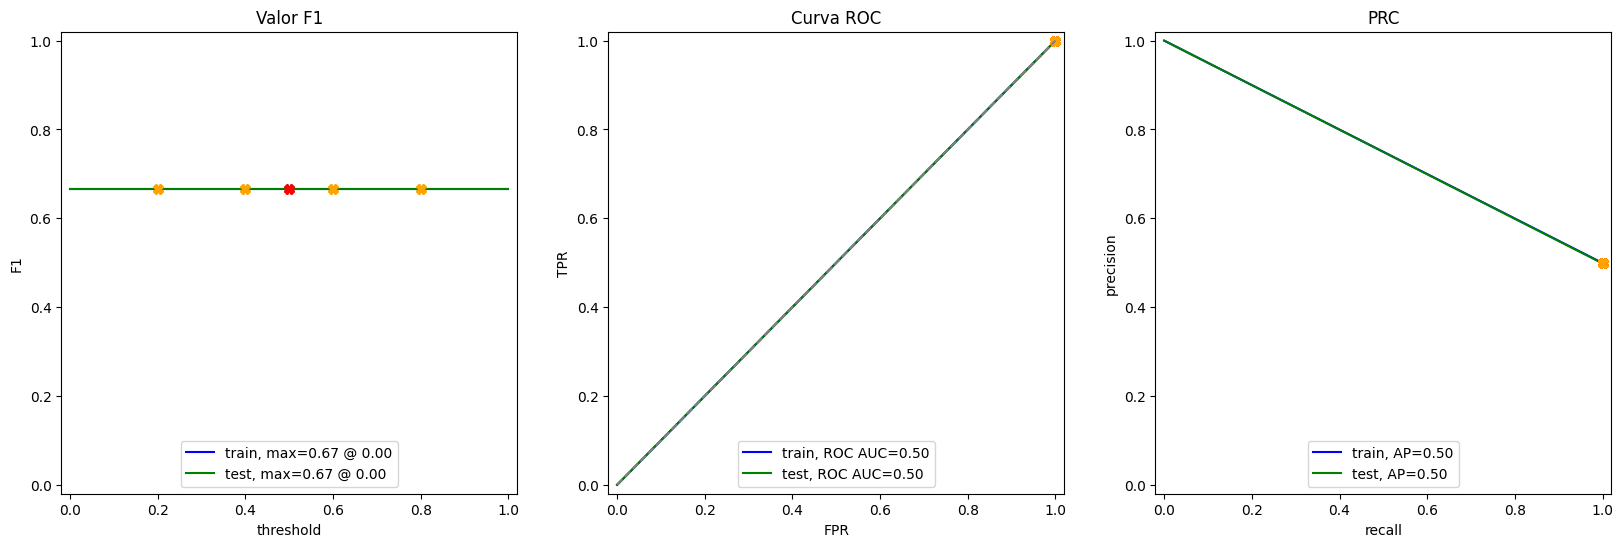

In [32]:
#Evaluación del modelo
evaluate_model(dummy_model, features_train_ntkl, train_target, features_test_ntkl, test_target)

### Modelo 1 - NLTK, TF-IDF y LR

TF-IDF

In [33]:
#Creación del modelo
param_grid = {'solver':['liblinear'] ,
              'penalty': ['l1', 'l2'],
              'random_state' : [12345]
             }

model_1 = GridSearchCV(LogisticRegression(), 
                        param_grid, 
                        scoring ='f1',  
                        cv=5
                       )

#Entrenamiento
model_1.fit(features_train_ntkl,train_target)
model_1 = model_1.best_estimator_
model_1

LogisticRegression(random_state=12345, solver='liblinear')

          train  test
Accuracy   0.93  0.88
F1         0.93  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


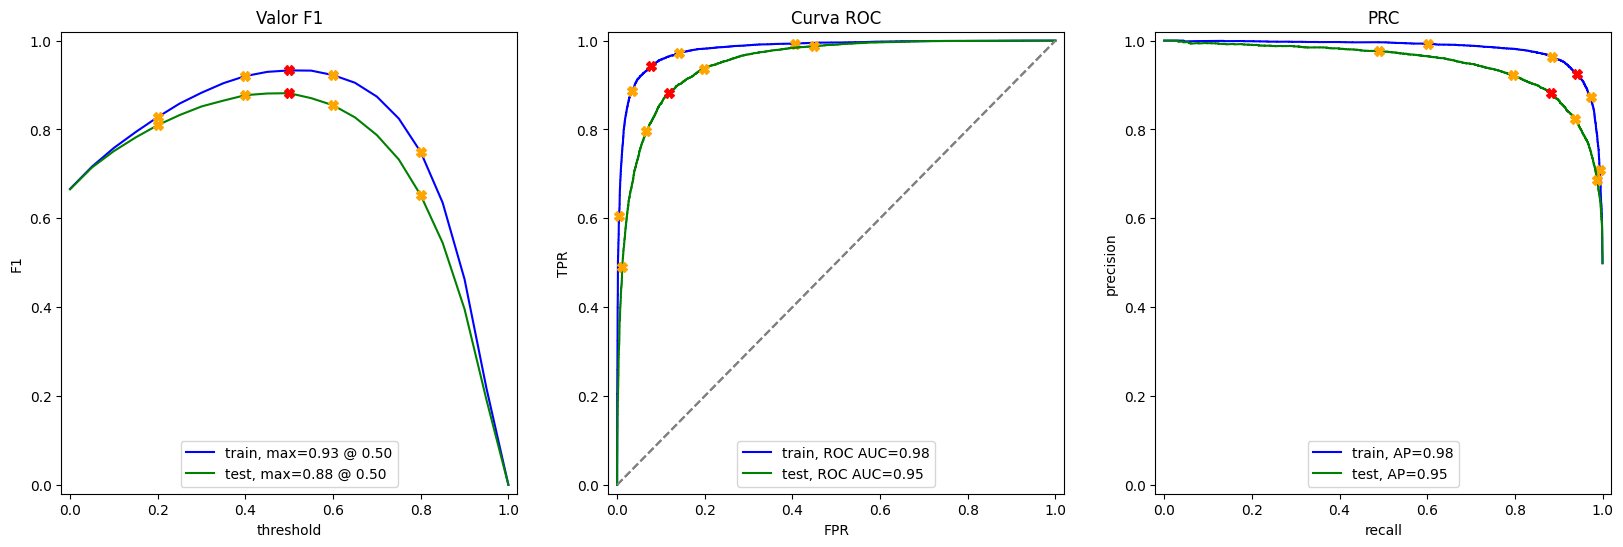

In [34]:
#Evaluación del modelo
evaluate_model(model_1, features_train_ntkl, train_target, features_test_ntkl, test_target)

### Modelo 2 - spaCy, TF-IDF y DecisionTree

In [35]:
#Creación del modelo
param_grid = {'criterion':['gini', 'entropy'] ,
              'max_depth': [10,15],
              'random_state' : [12345]
             }

model_2 = GridSearchCV(DecisionTreeClassifier(), 
                        param_grid, 
                        scoring ='f1',  
                        cv=5
                       )

model_2.fit(features_train_spacy,train_target)
model_2 = model_2.best_estimator_
model_2

In [ ]:
#predict
my_reviews_pred=model_2.predict(features_train_spacy)
metrics.f1_score(train_target, my_reviews_pred)

In [ ]:
#Evaluación del modelo
evaluate_model(model_2, features_train_spacy, train_target, features_test_spacy, test_target)

### Modelo 3 - spaCy, TF-IDF y LR

In [ ]:
#Creación del modelo
param_grid = {'solver':['liblinear'] ,
              'penalty': ['l1', 'l2'],
              'random_state' : [12345]
             }

model_3 = GridSearchCV(LogisticRegression(), 
                        param_grid, 
                        scoring ='f1',  
                        cv=4
                       )

model_3.fit(features_train_spacy,train_target)
model_3 = model_3.best_estimator_
model_3

In [ ]:
#Evaluación del modelo
evaluate_model(model_3, features_train_spacy, train_target, features_test_spacy, test_target)

### Modelo 4 - spaCy, TF-IDF y LGBMClassifier

In [ ]:
%%time
#Creación del modelo
param_grid = {'learning_rate': [.1,0.15],
              'max_depth': [10,15],
              'n_estimators': [100,150],
              'n_jobs': [-1],
              'random_state' : [12345],
              'verbose': [-1]
             }

model_4 = GridSearchCV(LGBMClassifier(), 
                        param_grid, 
                        scoring ='f1',  
                        cv=4
                       )

model_4.fit(features_train_spacy,train_target)
model_4 = model_4.best_estimator_
model_4

In [ ]:
#Evaluación del modelo
evaluate_model(model_4, features_train_spacy, train_target, features_test_spacy, test_target)

###  Modelo 9 - BERT

In [ ]:
import torch
import transformers

In [ ]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased') #Creación de tokens
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):

    ids_list = []
    attention_mask_list = []


    for input_text in texts:
        ids = tokenizer.encode(
            input_text,
            add_special_tokens = True,
            truncation = True,
            max_length = max_length
        ) # creación de los ids
        padded = np.array(ids + [0]*(max_length - len(ids))) #Relleno del vector con 0
        attention_mask = np.where(padded != 0, 1,0) # creación de mascara
        
        ids_list.append(padded) # Lista de ids
        attention_mask_list.append(attention_mask)

    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        
    model.to(device)
    if not disable_progress_bar:
        print(f'Uso del dispositivo {device}.')

    # obtener insertados en lotes

    embeddings = []

    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
        # unión de vectores de ids (de tokens) a un tensor
        ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        # unión de vectores de máscaras de atención a un tensor
        attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size*i:batch_size*(i+1)])
 
        with torch.no_grad():
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)
        embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())

    return np.concatenate(embeddings)

In [ ]:

%%time
# bert para entrenamiento
train_features_9 = BERT_text_to_embeddings(df_reviews_train['review'][:200], force_device=None)

Uso del dispositivo cpu.


  0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_106/2251451643.py:36: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)


In [ ]:
# bert para prueba
test_features_9 = BERT_text_to_embeddings(df_reviews_test['review'][:200], force_device=None)

In [ ]:
#Guardar insertados
np.savez_compressed('features_9.npz', train_features_9 = train_features_9,test_features_9=test_features_9)

#cargar insertados generados
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']
    
# train_features_9

In [ ]:
%%time

param_grid = {'solver':['liblinear'] ,
              'penalty': ['l1', 'l2'],
              'random_state' : [12345]
             }

model_9 = GridSearchCV(LogisticRegression(), 
                        param_grid, 
                        scoring ='f1',  
                        cv=4
                       )


#entrenamiento de modelo
model_9.fit(train_features_9, train_target[:200])
model_9 = model_9.best_estimator_

In [ ]:
#Evaluación de modelo
evaluate_model(model_9, train_features_9, train_target[:200], test_features_9, test_target[:200])

El mejor modelo obtenido desde la perspectiva de la validación con F1_score fueron los modelos de regresión lineal, ya sea con lematización usando NTKL o spaCy, en ambos casos obtivimos los mismos valores, sus curvas están próximas del conjunto de entramiento y prueba, mientras que una de las peores fue la elaborada con arbololes de decisión.

## Mis reseñas

Se probaran los modelos obtenidos con nuevas reseñas para probar su correcto funcionamiento, se realizará el preprocesamiento y se utilizara la lematización con spacy para despues vectorizarlos

In [ ]:
# puedes eliminar por completo estas reseñas y probar tus modelos en tus propias reseñas; las que se muestran a continuación son solo ejemplos

my_reviews = pd.DataFrame([
    
    "I've never heard of One Piece anime, in fact I'm not into anime at all. But this, this was a complete experience, it is bloody addictive.",
    "I did not simply like it, not my kind of movie.",
    "I was impressed with the fun world they had created. It really looks fabulous and I really appreciate it when a movie is eyecandy from start till finish.",
    "What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won't like this!",
    "The story gets lost, the real world characters don't add much, and not much changes in the end.",
    "I was really fascinated with the movie",
    "I've never gonna see the movie again. It sucks",
    "I didn't expect the reboot to be so good! Writers really cared about the source material",
    "I really loved it!, I think I can see the movie over and over again without get boring"

],columns = ['review'])

pos = [1,0,1,0,0,1,0,1,1]


my_reviews['review_norm'] = my_reviews['review']\
    .transform(lambda x: re.sub(pattern, " ", x).lower().split()) \
    .transform(lambda x: " ".join(x))

my_reviews

In [ ]:
#probabilidad de los reviews
texts = my_reviews['review_norm']
lemm = lemma(texts, mode = 1) #Lematización
my_reviews_tf_idf = count_tf_idf.transform(lemm) #Vectorización

### Modelo 2

In [ ]:
#Predicción
my_reviews_pred = model_2.predict(my_reviews_tf_idf)
my_reviews_pred_prob = model_2.predict_proba(my_reviews_tf_idf)[:,1]

print(f'Valor F1: {metrics.f1_score(pos, my_reviews_pred):.2f}')
print()
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

### Modelo 3

In [ ]:
#Predicción
my_reviews_pred = model_3.predict(my_reviews_tf_idf)
my_reviews_pred_prob = model_3.predict_proba(my_reviews_tf_idf)[:,1]

print(f'Valor F1: {metrics.f1_score(pos, my_reviews_pred):.2f}')
print()
for i, review in enumerate(texts.str.slice(0, 100)):
        print(f'{my_reviews_pred_prob[i]:.2f}: {review}')

### Modelo 4

In [ ]:
#Predicción
my_reviews_pred = model_4.predict(my_reviews_tf_idf)
my_reviews_pred_prob = model_4.predict_proba(my_reviews_tf_idf)[:,1]

print(f'Valor F1: {metrics.f1_score(pos, my_reviews_pred):.2f}')
print()
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

### Modelo 9

In [ ]:
#Vectorización con Bert
my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

my_reviews_pred = model_9.predict(my_reviews_features_9)
my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]
print(f'Valor F1: {metrics.f1_score(pos, my_reviews_pred):.2f}')
print()

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

## Conclusiones

Trabajamos con un dataset que contaba con un tamaño de de 47331 datos y 16 columnas, entre los que se combinan datos de entrenamiento y datos de prueba, contaba con dos culumnas con valores nulos (`average_rating` y `votes`) estos al no afectar al estudio se decidió dejar los datos asi.

Se realizó un analisis exploratorio en donde se ve el invremento de lanzamientos de peliculas conforme pasaban los años,asi como la cantidad de reseñas por años. En cuanto al balanceo de las opniones negativas y positivas(sentimiento) están bastante cercanas por lo que el target está balanceado. 

Se probaron 4 modelos regresión logística en donde se probaron con lematización NTKL y spaCy en estos no se notaron diferencias entre sus resultados, árbol de decisión, LGBM estos dos últimos con lematización  en spacy unicamente y con vectorización de TF-IDF, por último se utilizó la regresión linear con BERT.

El mejor resultado obtenido fue con el modelo de regresión lineal ya sea con NTKL y spaCy, este tambien tuvo el mejor rendimiento con las reseñas creadas